GaussianNonconjNIG(mu=4.999513,sigmasq=1.110480)
GaussianNonconjNIG(mu=14.516256,sigmasq=1.038181)
GaussianNonconjNIG(mu=-11.474766,sigmasq=0.943650)
GaussianNonconjNIG(mu=-1.804024,sigmasq=0.983296)
GaussianNonconjNIG(mu=3.509972,sigmasq=1.066896)
GaussianNonconjNIG(mu=0.360037,sigmasq=0.933768)
GaussianNonconjNIG(mu=-12.089482,sigmasq=0.809378)
GaussianNonconjNIG(mu=-11.403158,sigmasq=0.853680)
GaussianNonconjNIG(mu=5.424513,sigmasq=0.998535)
10000
used states:  9
99
105
160
168
181
218
279
296
317
340
365
370
372
400
446
460
477
549
568
581
607
642
644
645
650
702
704
849
854
878
988
1049
1098
1100
1129
1144
1158
1190
1205
1218
1230
1292
1344
1346
1347
1396
1494
1505
1521
1551
1553
1605
1610
1683
1716
1746
1747
1761
1881
1904
1919
1930
1977
1990
2014
2026
2027
2032
2048
2052
2141
2143
2220
2256
2292
2304
2309
2310
2323
2338
2461
2469
2481
2516
2546
2577
2605
2635
2664
2691
2705
2776
2808
2809
2862
2884
2943
2966
2970
2973
2998
2999
3116
3124
3127
3186
3197
3230
3251
3277
3294
3320
3

/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/cnv_detect_final/analysis/pyhsmm/models.py:1121: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mega_list_z = np.vstack(np.tile(np.diag(np.ones(nhs)),(len(s.data), 1)) for s in mb_states_list)


-3204.231007014885

.-3021.988199813315

.-2809.0410182793335

.-2695.236873605767

.-2551.684964334375

.-2491.6012125129587

.-2422.0464941060873

.-2390.4721279867636

.-2351.8709398089895

.-2336.5360806705667

.-2315.3287343529732

.-2305.517318860982

.-2293.4463041130143

.-2285.4049448386622

.-2276.870394139044

.-2272.9830530899144

.-2268.6275008502853

.-2264.7429162661306

.-2260.2257484715497

.-2259.03772303483

.-2256.870719156091

.-2252.6159374721087

.-2248.1902499337543

.-2245.6012606367394

.-2241.359101202496

.  [ 25 done,   10.01sec avg ]
-2238.355753438663

.-2233.8163438094384

.-2231.990308149827

.-2228.6828293362873

.-2226.7647901704418

.-2224.276302563566

.-2222.8487976579104

.-2220.171150296966

.-2219.5223504787505

.-2218.3084750007324

.-2216.5295082036946

.-2215.7907961593296

.-2214.2516249715177

.-2212.3364934047418

.-2212.9272231159566

.-2211.259633927034

.-2211.227089087291

.-2210.1069232729647

.-2209.883686876577

.-2209.6755726895567

/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/zfssz2/ST_MCHRI/BIG

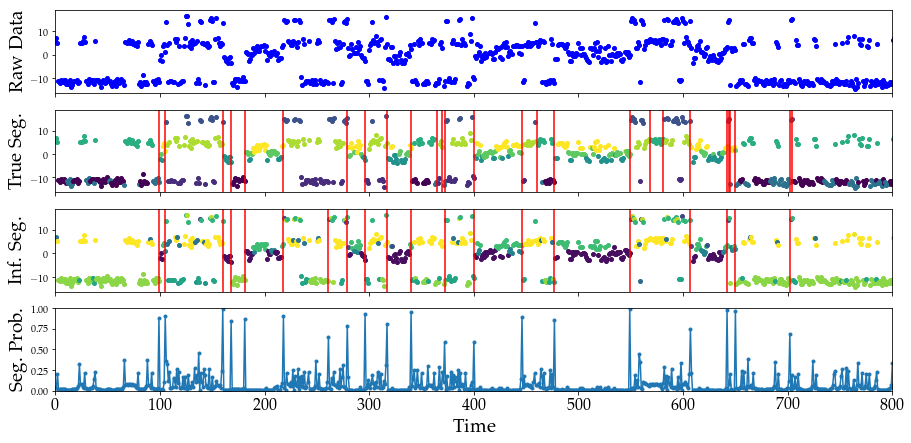

In [6]:



from __future__ import division
__author__ = 'saeedi'


from matplotlib import pyplot as plt
%matplotlib inline
from os.path import join, dirname, isfile
import argparse
from argparse import RawTextHelpFormatter
from pyhsmm.pybasicbayes import distributions
from pyhsmm import models, distributions
from pyhsmm.util.general import sgd_passes, hold_out, get_file
from pyhsmm.util.text import progprint_xrange, progprint
import numpy as np
import scipy.io
import os
import sys
from matplotlib import rc
import pyhsmm
from pyhsmm.util.text import progprint_xrange
import collections
import itertools
import operator
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)






####################################### Generate the data #####################################################
np.random.seed(4) #4
obs_dim = 1
xlim = 800
init_state_concentration = 1000.
alpha = 10
gamma = 1
N = 9 #9
sgd_or_mf = 'sgd' #'mf' or 'sgd' choose between these two
num_seqs = 10 #num of batches
num_samples = 10000
obs_hypparams = {'h_0':np.ones(obs_dim) * 0,
            'J_0':np.ones(obs_dim) * 0.01, #sq_0 #changes the hidden state detection (the lower the better) #0.01
            'alpha_0':np.ones(obs_dim) * 100, #(make the number of hidden states worse higher the better) #2
            'beta_0':np.ones(obs_dim) * 100} #1
obs_distns = [distributions.GaussianNonconjNIG(**obs_hypparams) for state in range(N)]
HDPHMMSVImodel = models.HMMSegStickyHDP(kappa = 0, alpha=alpha,gamma=gamma,init_state_concentration=init_state_concentration,
        obs_distns=obs_distns, weight_prior_mean = 0.0, weight_prior_std = 0.1, win_size = 1, use_obs_features = False)
for i in range(N):
    print(obs_distns[i])

lablefontsize = 19
plt.subplots(4, sharex=True, figsize =(15,7))
f2 = plt.subplot(4, 1, 2)
tempall = HDPHMMSVImodel.generate(num_samples, keep=False)
true_segments_0_1 = tempall[2].true_segmentation
all_states_seq = tempall[1]
all_states_seq = [x if x >= N else x + N for x in all_states_seq]
true_segmentation_prob = tempall[2].true_segmentation_prob
segment_indices = [i for i,val in enumerate(true_segments_0_1) if val==0]


#Making the batches
all_data = tempall[0]
good_length = num_seqs * int(len(all_data)/num_seqs)
all_data_sh = np.array(all_data[:good_length])
# all_data_sh -= np.mean(all_data_sh)
# all_data_sh /= np.std(all_data_sh)
data = np.reshape(all_data_sh, (num_seqs, int(len(all_data_sh)/num_seqs), obs_dim))
data = list(data)


#Coloring
cmap = plt.cm.get_cmap()
for idx, k in enumerate(all_states_seq):
    all_states_seq[idx] = all_states_seq[idx] if all_states_seq[idx] < N else all_states_seq[idx] - N
unused_states = [idx for idx in range(N) if idx not in all_states_seq]
np.random.seed(1)
colorseq = np.random.RandomState(0).permutation(np.linspace(0,1,N))
colors = dict((idx, v if False else cmap(v)) for idx, v in zip(np.array(range(N)),colorseq))
for state in unused_states:
    colors[state] = cmap(1.)
print('used states: ', N - len(unused_states))
#Plotting only if we have one dimension
if obs_dim == 1:
    for idx, point in enumerate(all_data_sh):
        plt.plot(idx, point, c=colors[all_states_seq[idx]], markersize=8, marker = '.')
else:
    for idx, point in enumerate(all_data_sh):
        plt.plot(idx, all_states_seq[idx], c=colors[all_states_seq[idx]], markersize=8, marker = '.')

for i in segment_indices:
    print(i)
    plt.axvline(i, c = 'r')
plt.xlim((0,xlim))
plt.ylabel('True Seg.', fontsize = lablefontsize)
f2.axes.xaxis.set_ticklabels([])

f1 = plt.subplot(4, 1, 1)
if obs_dim == 1:
    for idx, point in enumerate(all_data_sh):
        plt.plot(idx, point, markersize=8, marker = '.', c = 'b')

plt.ylabel('Raw Data', fontsize = lablefontsize)
plt.xlim((0,xlim))
f1.axes.xaxis.set_ticklabels([])


################################ MAKE TRAIN AND TEST DATASETS IN BATCHES ##########################




np.random.seed(100)
print('loading data...')
alldata = data
allseqs = np.array(data)
#datas, heldout = hold_out(allseqs,0.05)

datas = list(allseqs[:allseqs.shape[0] - 1, :])
heldout = list(allseqs[-1:, :])

training_size = sum(data.shape[0] for data in datas)
print('...done!')



###################################################  RUN SVI or MF OVER THE TRAINING SET     ########################
init_state_concentration = 1000.
#kappa = 0.
#alpha_0 = 10 #(1)
alpha = 100#200
gamma = 100#200
kappa_sticky = 1
win_size = 1
use_obs_features = False
N = 30 #10
infseed = 20

obs_hypparams = {'h_0':np.zeros(obs_dim),
            'J_0':np.ones(obs_dim) * 0.001, #sq_0 #changes the hidden state detection (the lower the better) #0.001
            'alpha_0':np.ones(obs_dim) * 0.1, #(make the number of hidden states worse higher the better)
            'beta_0':np.ones(obs_dim) * 1}
# obs_distns = [distributions.ScalarGaussianNonconjNIG(**obs_hypparams) for state in xrange(N)]
obs_distns = [distributions.GaussianNonconjNIG(**obs_hypparams) for state in range(N)]

print('inference observation')
for i in range(N):
    print(obs_distns[i])

print('feature weights before mean field: ', '\n', HDPHMMSVImodel.feature_weights, '\n')

HDPHMMSVImodel = models.HMMSegStickyHDP(obs_dim = 1, kappa = 0, alpha=alpha,gamma=gamma,init_state_concentration=init_state_concentration,
        obs_distns=obs_distns, bern_or_weight = 'weight', svi_or_gibbs = 'svi',
        weight_prior_mean = 0, weight_prior_std = 0.1, win_size = win_size,  use_obs_features = use_obs_features)



np.random.seed(infseed)
if sgd_or_mf == 'mf':
    print('feature weights before mean field: ', '\n', HDPHMMSVImodel.feature_weights, '\n')
    for i in range(14):
        HDPHMMSVImodel.add_data(datas[i])
    for i in range(20):
        print(HDPHMMSVImodel.meanfield_coordinate_descent_step(0.5))
    print('feature weights after mean field: ', '\n', HDPHMMSVImodel.feature_weights, '\n')
else:
    scores = []
    sgdseq = sgd_passes(tau=0.8,kappa=0.9,datalist=datas, minibatchsize=4,npasses=30) #4, 3
    for t, (data, rho_t) in progprint(enumerate(sgdseq)):
        HDPHMMSVImodel.meanfield_sgdstep(data, np.array(data).shape[0] / np.float(training_size)  , rho_t)
        score = HDPHMMSVImodel.log_likelihood(heldout)
        # print 'feature weights after mean field: ', HDPHMMSVImodel.feature_weights
        print(score)
        print("")
        if t % 1 == 0:
            scores.append(score)
    # plt.plot(scores)
    # plt.show()



######################################Plotting the states and segments ###########################

f3 = plt.subplot(4, 1, 3)
all_probpairs = []
all_state_seqs = []
all_inferred_segs = []
all_used_states = []
for seq_num in range(num_seqs - 1):
    print('seq num: ' + str(seq_num))
    nhs = N

    #Need this to choose between SVI and mean field
    if sgd_or_mf == 'sgd':
        s_num = -1
        HDPHMMSVImodel.add_data(datas[seq_num], generate=False)
        HDPHMMSVImodel.states_list[s_num].meanfieldupdate()
    else:
        s_num = seq_num

    #States sequence
    states_seq = HDPHMMSVImodel.states_list[s_num].expected_states.argmax(1).astype('int32')
    states_seq = [x if x >= N else x + N for x in states_seq]
    all_state_seqs.extend(states_seq)
    #States usage
    canonical_ids = collections.defaultdict(lambda x=itertools.count(): next(x))

    for state in states_seq:
        canonical_ids[state]
    used_states = list(map(operator.itemgetter(0), sorted(canonical_ids.items(),key=operator.itemgetter(1))))
    print('used:', np.array(used_states) - N)
    all_used_states.extend(used_states)
    segments_seq = []
    for idx, (i, j) in enumerate(zip(HDPHMMSVImodel.states_list[s_num].all_expected_stats[1], HDPHMMSVImodel.states_list[s_num].data)):
        temp_seg = 1- np.argmax((np.sum(i[:nhs]), np.sum(i[nhs:])))
        all_probpairs.append((np.log(np.sum(i[:nhs])), np.log(np.sum(i[nhs:]))))
        segments_seq.append(temp_seg)

    cmap = plt.cm.get_cmap()
    unused_states = [idx for idx in range(N) if idx not in used_states]
    np.random.seed(1)
    colorseq = np.random.RandomState(0).permutation(np.linspace(0,1,N))
    colors = dict((idx, v if False else cmap(v)) for idx, v in zip(np.array(range(N)) + N,colorseq))
    for state in unused_states:
        colors[state] = cmap(1.)

    temp_data = datas[seq_num]
    min_data_point = np.min(temp_data)
    max_data_point = np.max(temp_data)
    #finding the segments
    segment_indices = [i for i, j in enumerate(segments_seq) if j == 1]


    for idx, point in enumerate(temp_data):
        if obs_dim == 1 :
            plt.plot(idx + seq_num * len(temp_data), point, c=colors[states_seq[idx]], marker = '.', markersize=8)
        else:
            plt.plot(idx + seq_num * len(temp_data), states_seq[idx], c=colors[states_seq[idx]], marker = '.', markersize=8)
    current_i = 0
    for i in segment_indices:
        if i - current_i >= 0:
            print('inf: ', i + seq_num * len(temp_data))
            plt.axvline(i + seq_num * len(temp_data), color='r') #, linewidth=1
            all_inferred_segs.append(i + seq_num * len(temp_data))
        current_i = i
total_log_prob = 0
for idx, seg in enumerate(true_segments_0_1[:len(all_probpairs)]):
    total_log_prob += all_probpairs[idx][1 - int(seg)]
print('log_prob: ', total_log_prob)
print('used_states: ', len(np.unique(np.array(all_used_states) - N)))
plt.ylabel('Inf. Seg.', fontsize = lablefontsize)

plt.xlim((0,xlim))
plt.subplot(4, 1, 4)
break_prob = [np.exp(i[0]) for i in all_probpairs]
plt.plot(range(len(break_prob)), break_prob, marker = '.')
plt.ylabel('Seg. Prob.', fontsize=lablefontsize)
plt.xlabel('Time', fontsize = lablefontsize)
plt.ylim((0,1))
plt.xlim((0,xlim))
f3.axes.xaxis.set_ticklabels([])
plt.tick_params(axis='x', labelsize=16)
plt.show()